In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_excel('aus_weather_train.csv.xlsx', sheet_name = 0)
test_df = pd.read_excel('aus_weather_test.csv.xlsx', sheet_name = 0)

In [3]:
train_df.head()

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,124741,2011-08-07,SalmonGums,3.2,19.0,0.0,NE,31.0,N,NE,...,60.000000,34.000000,1017.64994,1015.255889,4.447461,4.50993,10.4,18.6,0,1
1,66508,2015-08-04,MelbourneAirport,1.9,10.9,0.0,N,39.0,WNW,WNW,...,62.000000,53.000000,1023.40000,1019.700000,6.000000,7.00000,7.5,9.6,0,0
2,97548,2011-12-11,Adelaide,14.6,22.2,0.0,W,44.0,SSE,WSW,...,51.000000,36.000000,1012.30000,1010.700000,4.447461,4.50993,17.1,21.4,0,0
3,83254,2015-06-04,Dartmoor,5.1,12.3,0.4,N,44.0,NNE,N,...,68.880831,51.539116,1012.00000,1010.600000,4.447461,4.50993,8.3,11.6,0,1
4,98992,2016-01-22,Adelaide,21.5,29.9,8.0,WSW,61.0,N,ESE,...,77.000000,93.000000,1008.90000,1008.700000,4.447461,4.50993,24.5,20.4,1,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51003 entries, 0 to 51002
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             51003 non-null  int64         
 1   Date           51003 non-null  datetime64[ns]
 2   Location       51003 non-null  object        
 3   MinTemp        51003 non-null  float64       
 4   MaxTemp        51003 non-null  float64       
 5   Rainfall       51003 non-null  float64       
 6   WindGustDir    51003 non-null  object        
 7   WindGustSpeed  51003 non-null  float64       
 8   WindDir9am     51003 non-null  object        
 9   WindDir3pm     51003 non-null  object        
 10  WindSpeed9am   51003 non-null  float64       
 11  WindSpeed3pm   51003 non-null  float64       
 12  Humidity9am    51003 non-null  float64       
 13  Humidity3pm    51003 non-null  float64       
 14  Pressure9am    51003 non-null  float64       
 15  Pressure3pm    5100

In [5]:
train_df.describe()

,Id,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000,51003.000000
mean,72363.522557,12.514055,22.452383,3.727230,42.004455,14.559865,19.176641,72.141290,57.485798,1016.617618,1014.318809,4.823919,4.926272,16.839297,20.798386,0.306433,0.499069
std,41600.971065,6.364356,7.097253,10.976383,14.125402,9.148614,9.070659,18.347793,21.487620,6.982791,6.919866,2.216901,2.069828,6.408578,6.855112,0.461016,0.500004
min,4.000000,-8.200000,-4.100000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-5.500000,-4.400000,0.000000,0.000000
25%,36091.500000,8.000000,17.200000,0.000000,33.000000,7.000000,13.000000,61.000000,43.000000,1012.300000,1009.900000,4.447461,4.509930,12.100000,15.800000,0.000000,0.000000
50%,72980.000000,12.194034,21.800000,0.000000,40.035230,13.000000,19.000000,73.000000,58.000000,1017.500000,1015.255889,4.447461,4.509930,16.600000,20.300000,0.000000,0.000000
75%,108510.000000,17.200000,27.300000,2.360918,50.000000,20.000000,24.000000,87.000000,73.000000,1020.800000,1018.500000,7.000000,7.000000,21.300000,25.300000,1.000000,1.000000
max,145458.000000,30.300000,47.300000,367.600000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.400000,1038.400000,8.000000,8.000000,39.000000,46.100000,1.000000,1.000000


In [6]:
train_df.isna().sum()

Id               0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
print(train_df.mean())
print('\n')
print(train_df.median())
print('\n')
print(train_df.mode())

Id               72363.522557
MinTemp             12.514055
MaxTemp             22.452383
Rainfall             3.727230
WindGustSpeed       42.004455
WindSpeed9am        14.559865
WindSpeed3pm        19.176641
Humidity9am         72.141290
Humidity3pm         57.485798
Pressure9am       1016.617618
Pressure3pm       1014.318809
Cloud9am             4.823919
Cloud3pm             4.926272
Temp9am             16.839297
Temp3pm             20.798386
RainToday            0.306433
RainTomorrow         0.499069
dtype: float64


Id               72980.000000
MinTemp             12.194034
MaxTemp             21.800000
Rainfall             0.000000
WindGustSpeed       40.035230
WindSpeed9am        13.000000
WindSpeed3pm        19.000000
Humidity9am         73.000000
Humidity3pm         58.000000
Pressure9am       1017.500000
Pressure3pm       1015.255889
Cloud9am             4.447461
Cloud3pm             4.509930
Temp9am             16.600000
Temp3pm             20.300000
RainToday            0.

In [8]:
train_df.drop('Id', axis = 1, inplace = True)

In [9]:
train_df.drop('Date', axis = 1, inplace = True)

In [10]:
train_df['Location'].unique()

array(['SalmonGums', 'MelbourneAirport', 'Adelaide', 'Dartmoor',
       'SydneyAirport', 'Portland', 'Ballarat', 'Albany', 'MountGambier',
       'Witchcliffe', 'Bendigo', 'CoffsHarbour', 'Launceston',
       'GoldCoast', 'PerthAirport', 'Wollongong', 'Perth', 'Mildura',
       'BadgerysCreek', 'Tuggeranong', 'WaggaWagga', 'Sydney', 'Sale',
       'Cairns', 'Darwin', 'Richmond', 'Melbourne', 'PearceRAAF',
       'Watsonia', 'Albury', 'Canberra', 'Townsville', 'Moree', 'Woomera',
       'Newcastle', 'Walpole', 'AliceSprings', 'NorfolkIsland',
       'Brisbane', 'Uluru', 'Nuriootpa', 'Nhil', 'MountGinini',
       'NorahHead', 'Katherine', 'Cobar', 'Williamtown', 'Hobart',
       'Penrith'], dtype=object)

In [11]:
train_df['WindGustDir'].unique()

array(['NE', 'N', 'W', 'WSW', 'NW', 'SSE', 'S', 'SSW', 'WNW', 'ENE', 'SW',
       'NNE', 'NNW', 'ESE', 'E', 'SE'], dtype=object)

In [12]:
train_df['WindDir9am'].unique()

array(['N', 'WNW', 'SSE', 'NNE', 'NW', 'ENE', 'NE', 'S', 'W', 'SW', 'NNW',
       'ESE', 'SE', 'WSW', 'E', 'SSW'], dtype=object)

In [13]:
train_df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1, inplace = True)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51003 entries, 0 to 51002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51003 non-null  object 
 1   MinTemp        51003 non-null  float64
 2   MaxTemp        51003 non-null  float64
 3   Rainfall       51003 non-null  float64
 4   WindGustSpeed  51003 non-null  float64
 5   WindSpeed9am   51003 non-null  float64
 6   WindSpeed3pm   51003 non-null  float64
 7   Humidity9am    51003 non-null  float64
 8   Humidity3pm    51003 non-null  float64
 9   Pressure9am    51003 non-null  float64
 10  Pressure3pm    51003 non-null  float64
 11  Cloud9am       51003 non-null  float64
 12  Cloud3pm       51003 non-null  float64
 13  Temp9am        51003 non-null  float64
 14  Temp3pm        51003 non-null  float64
 15  RainToday      51003 non-null  int64  
 16  RainTomorrow   51003 non-null  int64  
dtypes: float64(14), int64(2), object(1)
memory usage: 

MinTemp


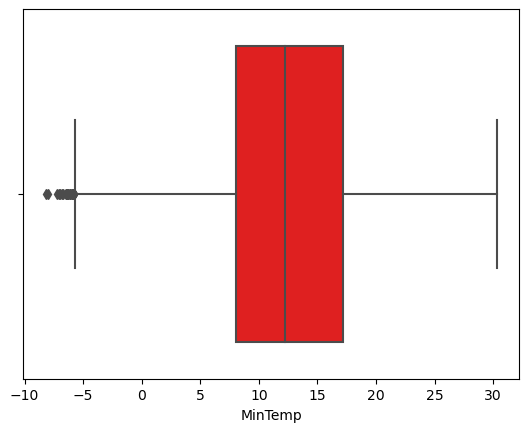

MaxTemp


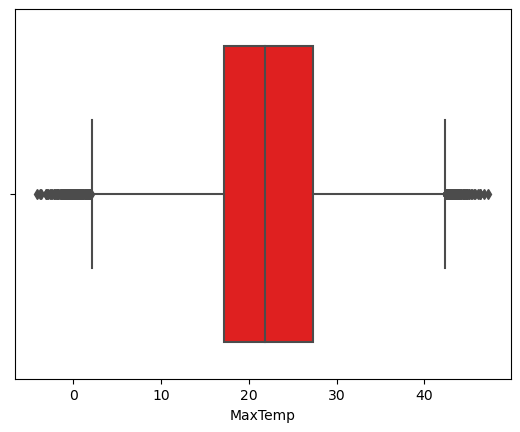

Rainfall


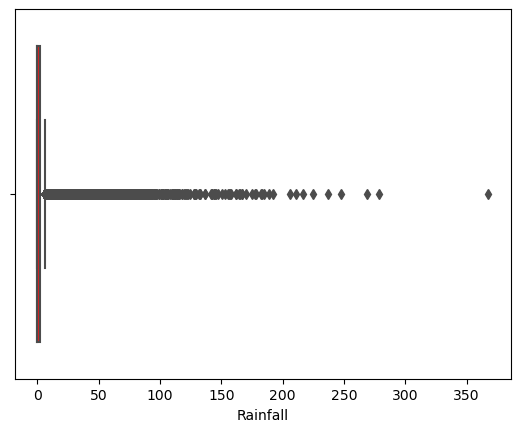

WindGustSpeed


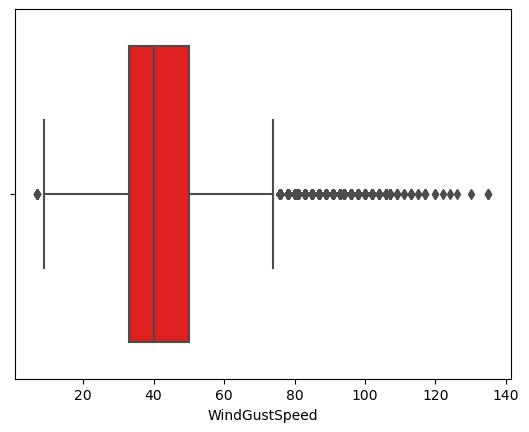

WindSpeed9am


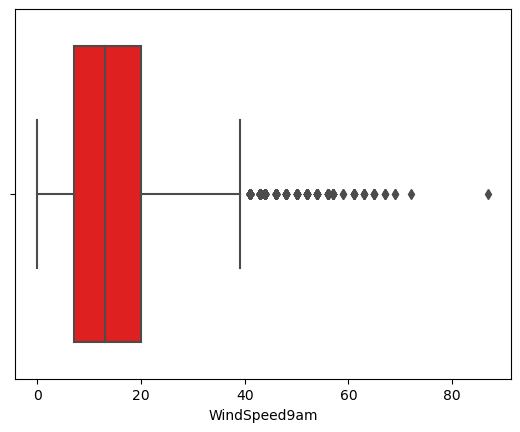

WindSpeed3pm


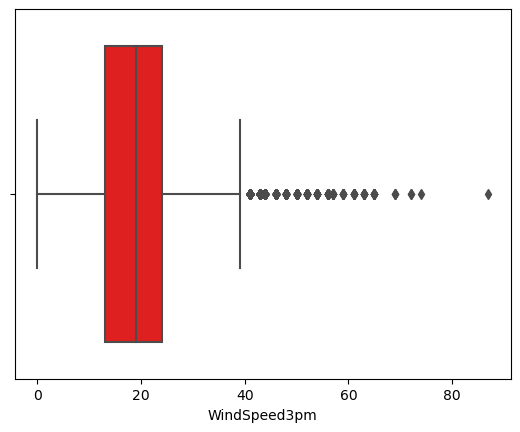

Humidity9am


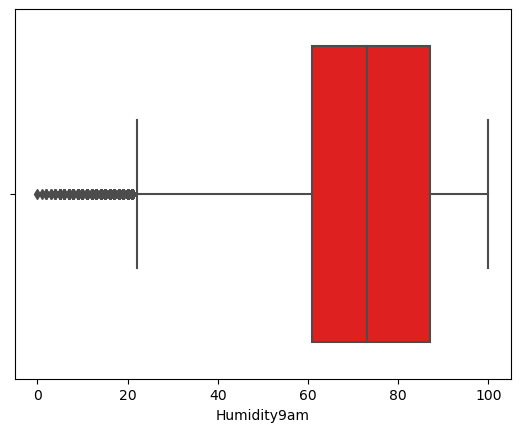

Humidity3pm


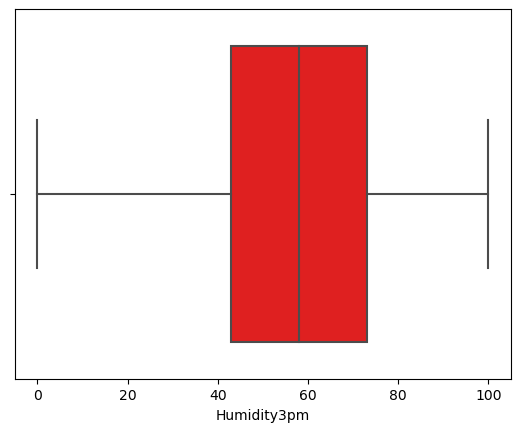

Pressure9am


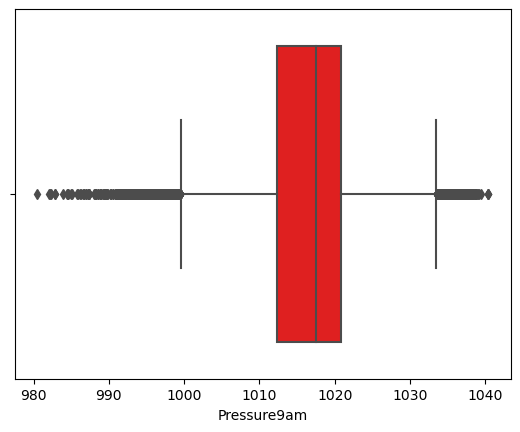

Pressure3pm


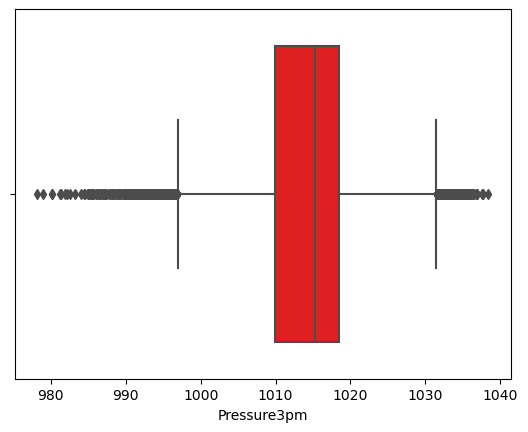

Cloud9am


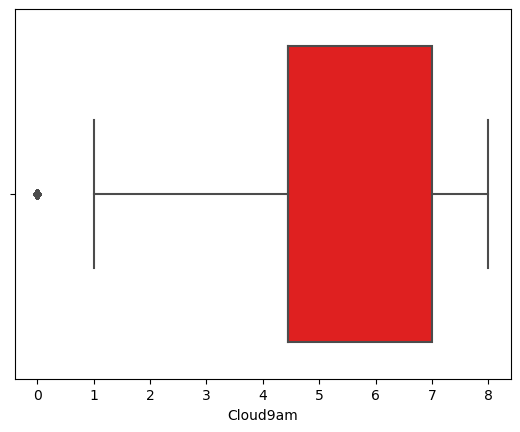

Cloud3pm


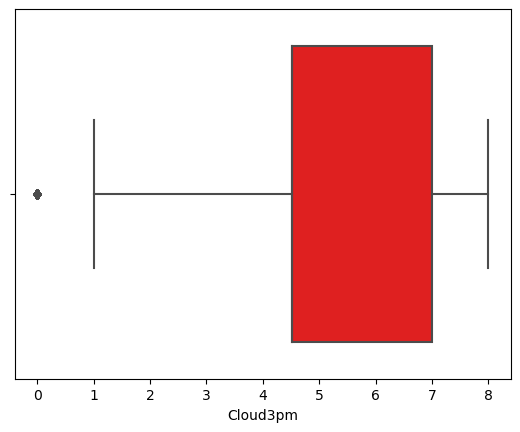

Temp9am


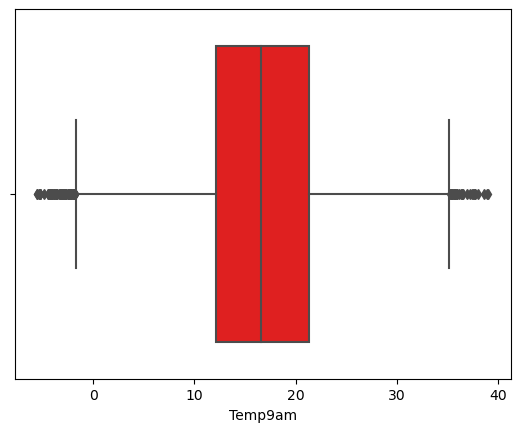

Temp3pm


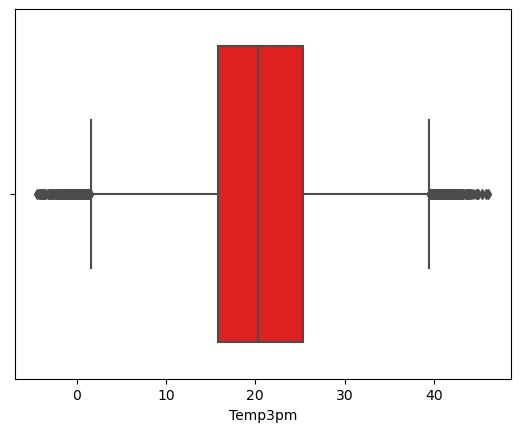

In [15]:
for col in train_df.iloc[:,1:15].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [16]:
def Outlier(var):
    for x in var.iloc[:, 1:15].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

MinTemp


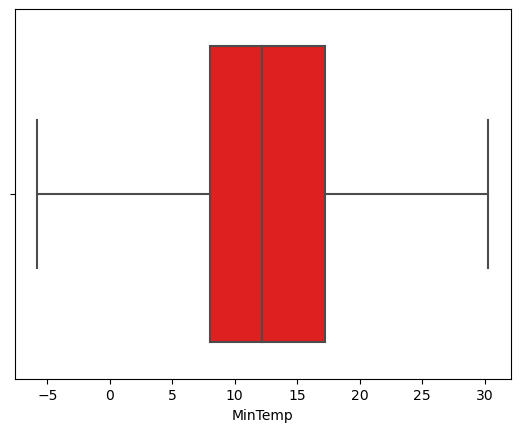

MaxTemp


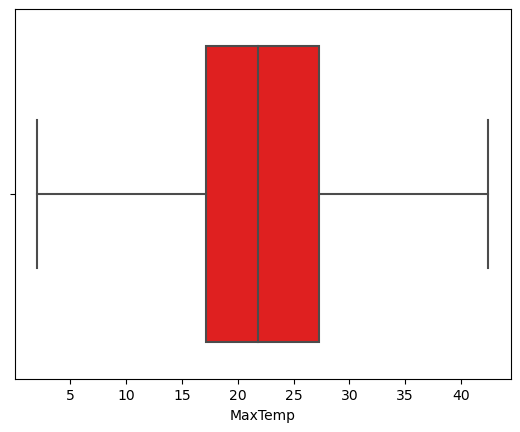

Rainfall


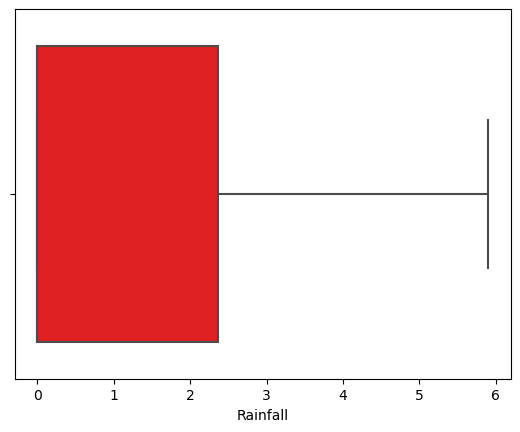

WindGustSpeed


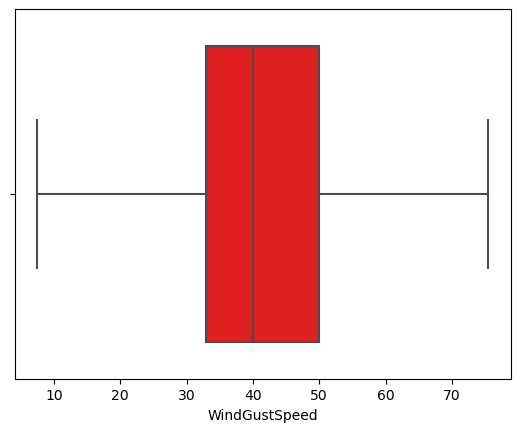

WindSpeed9am


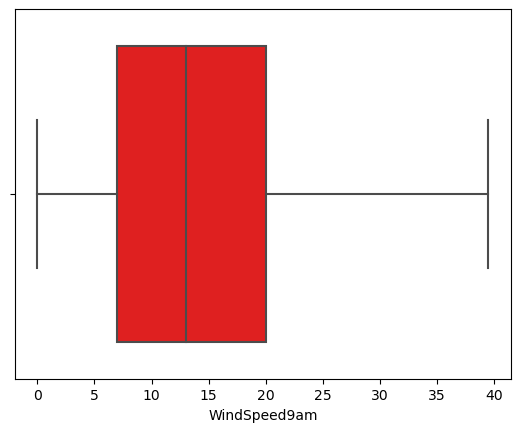

WindSpeed3pm


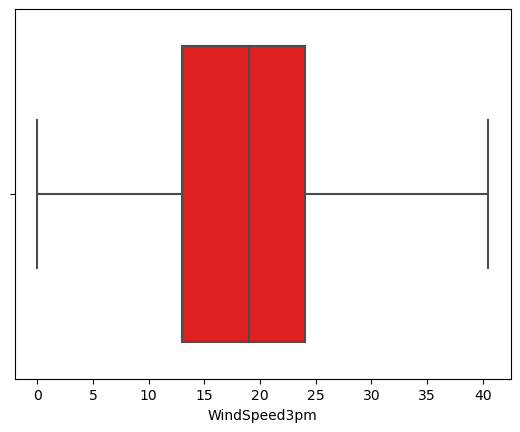

Humidity9am


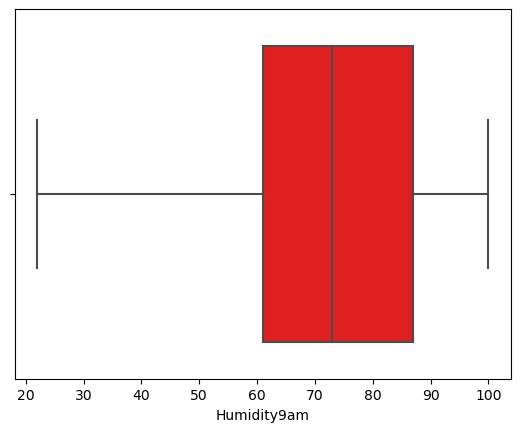

Humidity3pm


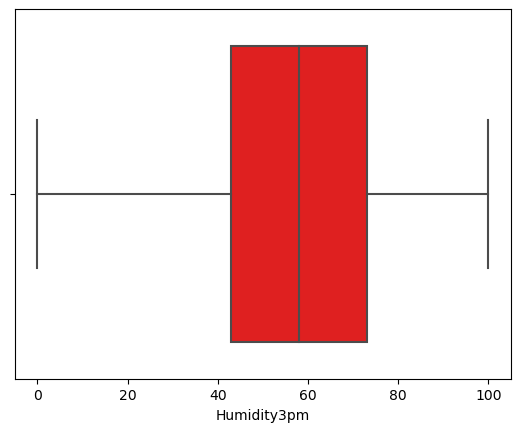

Pressure9am


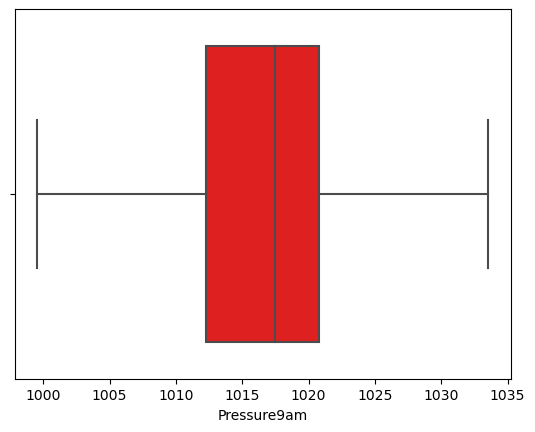

Pressure3pm


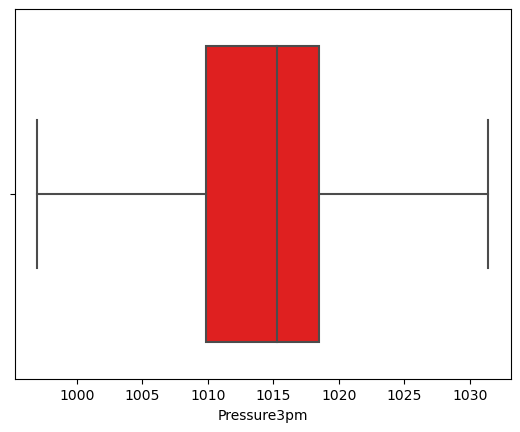

Cloud9am


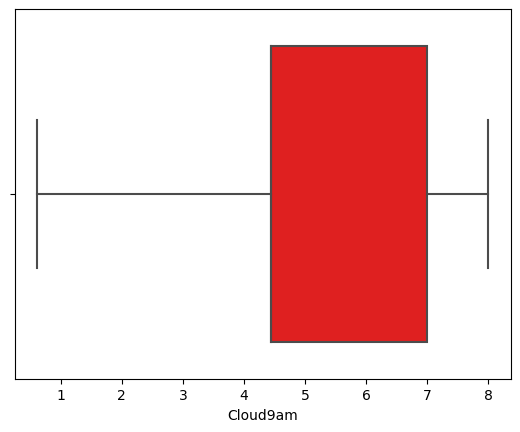

Cloud3pm


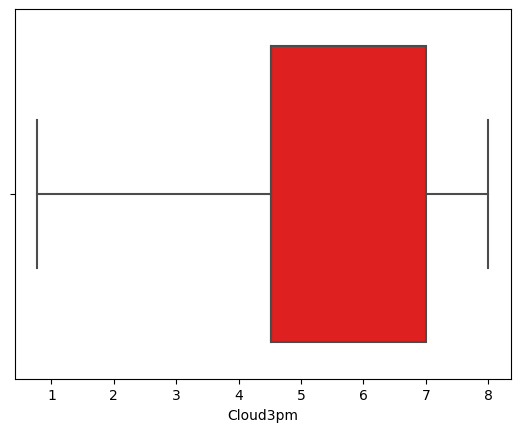

Temp9am


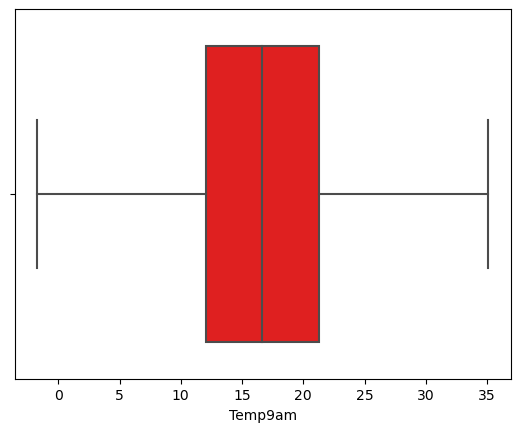

Temp3pm


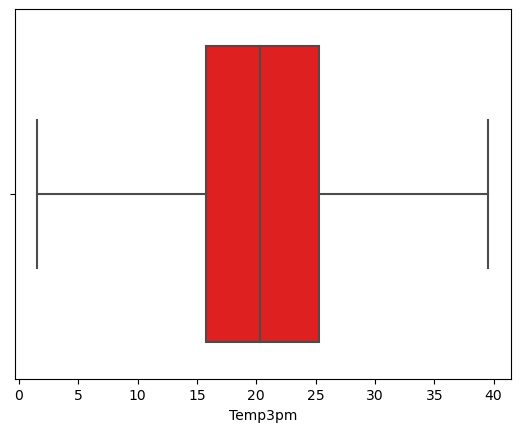

In [17]:
for col in train_df.iloc[:,1:15].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

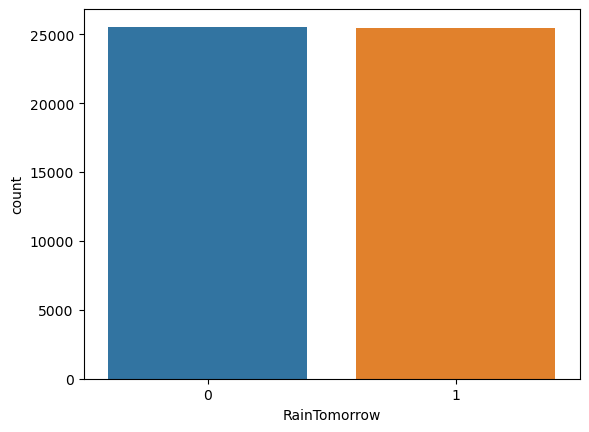

In [18]:
sns.countplot(df_train['RainTomorrow'])

<AxesSubplot:xlabel='RainToday', ylabel='count'>

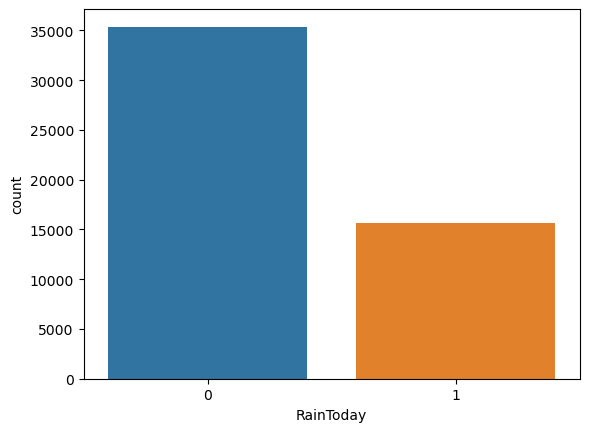

In [19]:
sns.countplot(df_train['RainToday'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

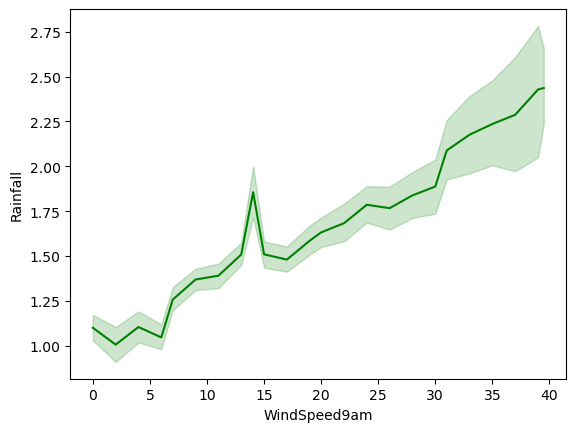

In [20]:
sns.lineplot(data=df_train,x='WindSpeed9am',y='Rainfall',color='green')

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

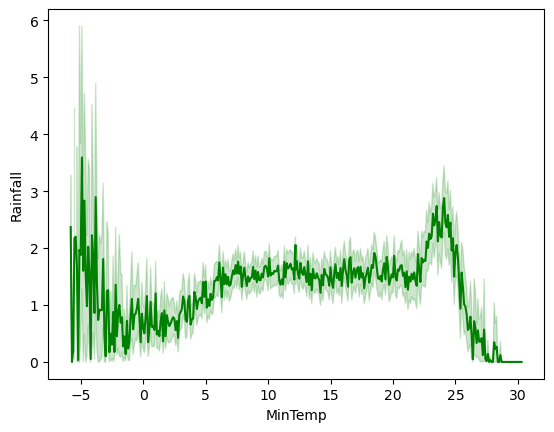

In [21]:
sns.lineplot(data=df_train,x='MinTemp',y='Rainfall',color='green')

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

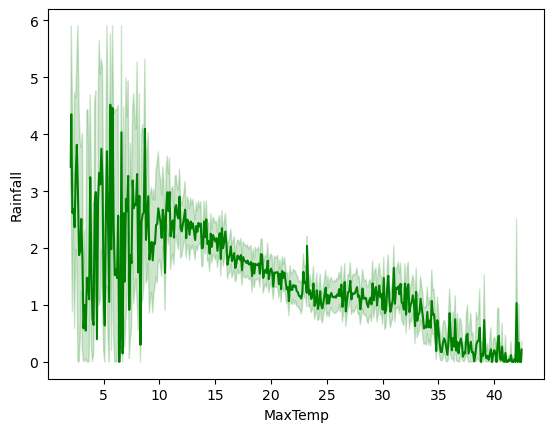

In [22]:
sns.lineplot(data=df_train,x='MaxTemp',y='Rainfall',color='green')

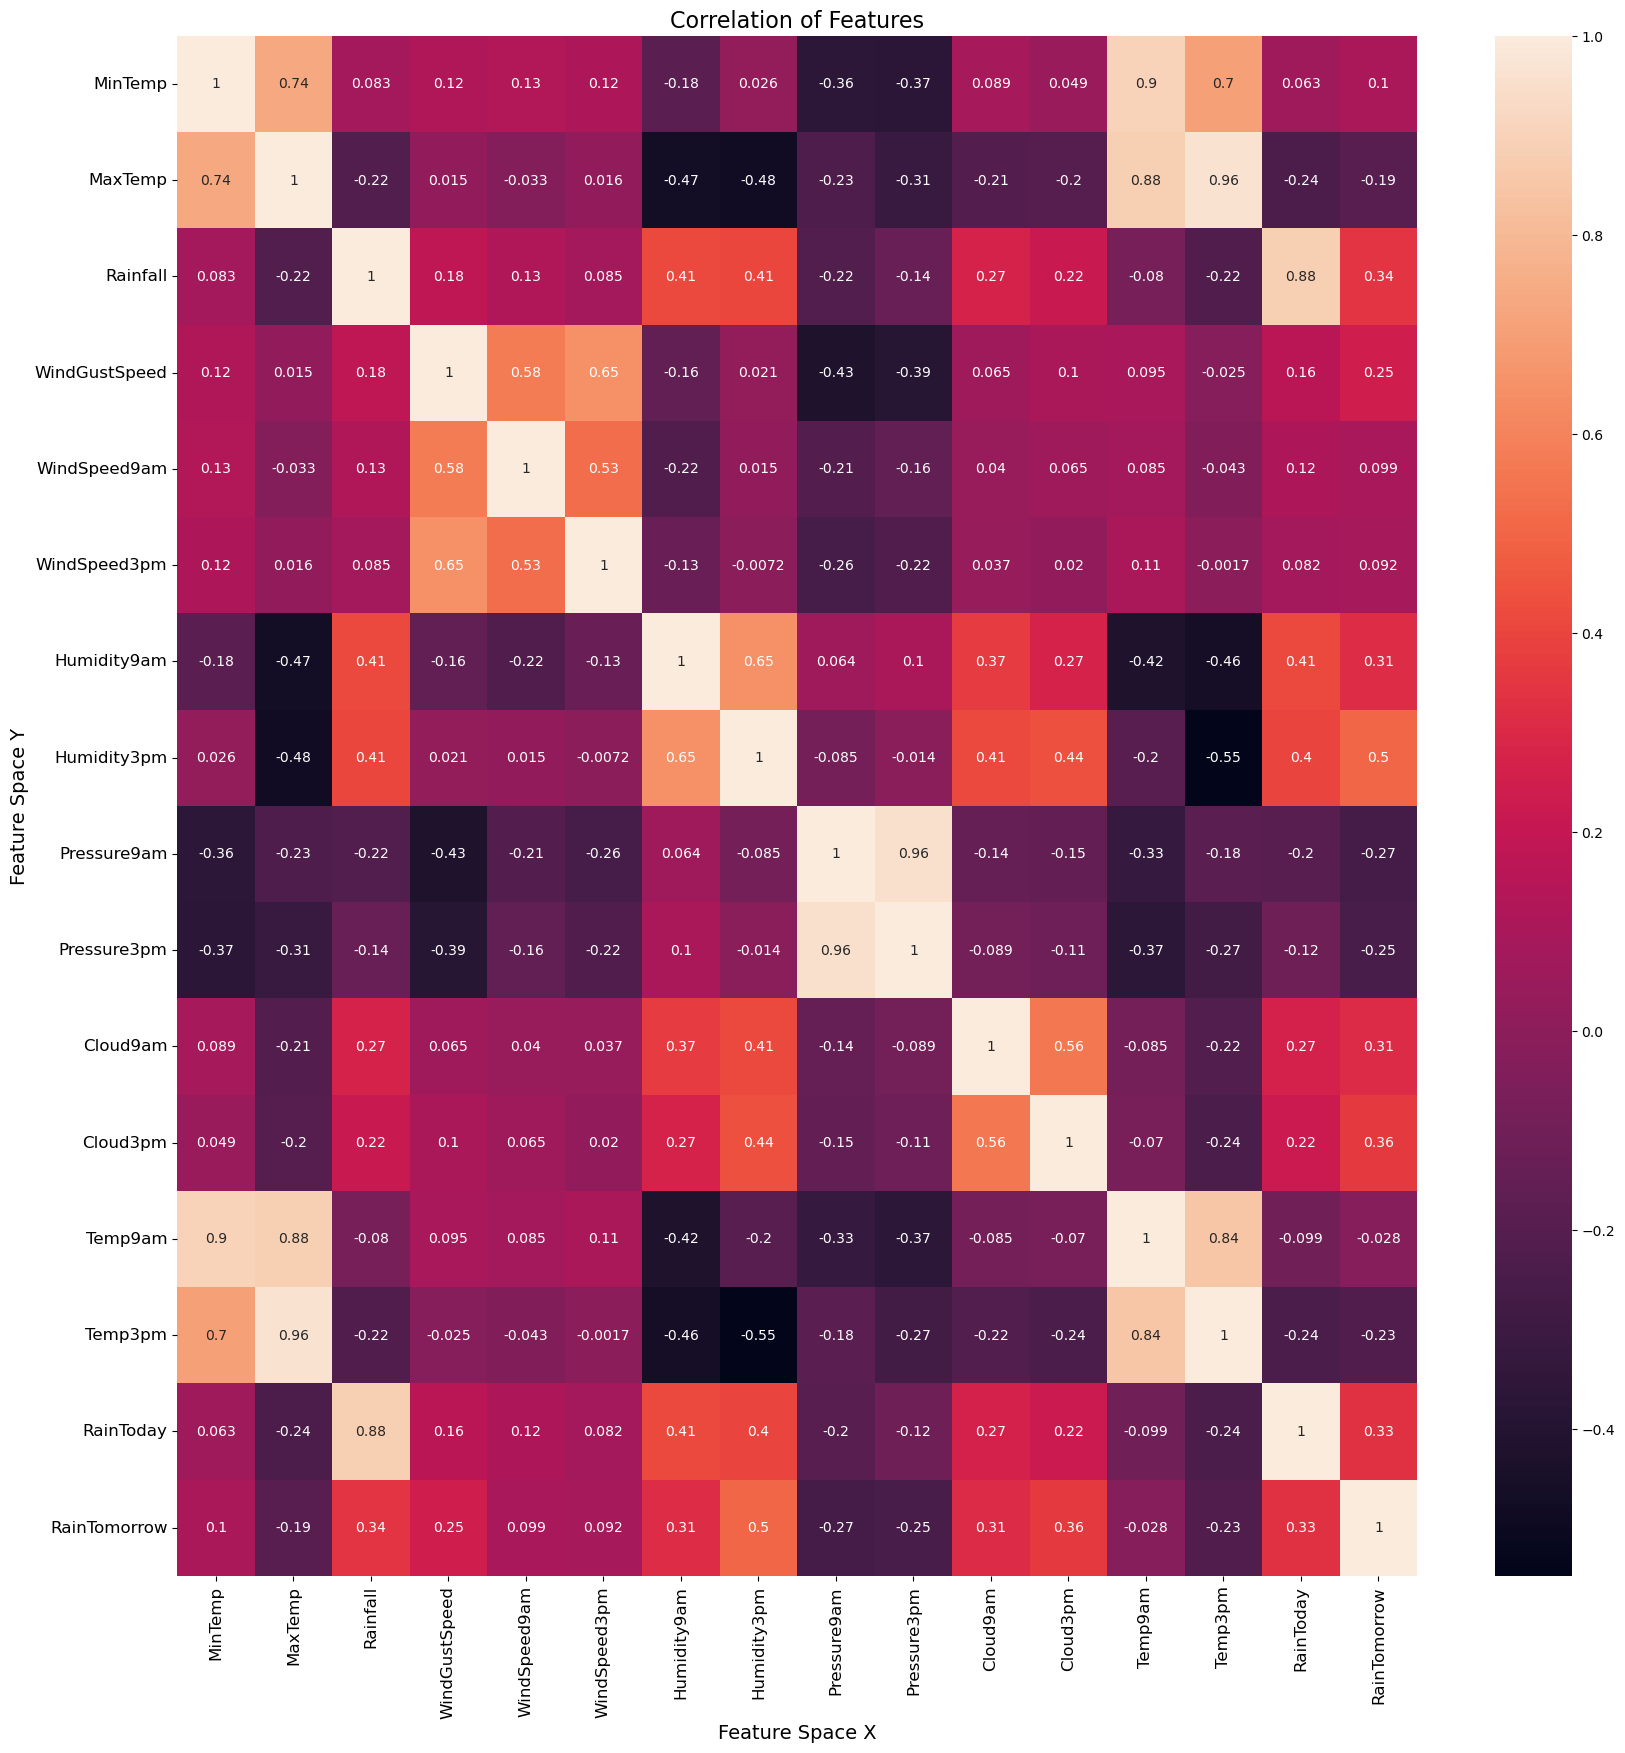

In [23]:
figure = plt.figure(figsize=[20, 20])
sns.heatmap(data=df_train.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

In [24]:
df_train.drop('Location', axis = 1, inplace = True)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51003 entries, 0 to 51002
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        51003 non-null  float64
 1   MaxTemp        51003 non-null  float64
 2   Rainfall       51003 non-null  float64
 3   WindGustSpeed  51003 non-null  float64
 4   WindSpeed9am   51003 non-null  float64
 5   WindSpeed3pm   51003 non-null  float64
 6   Humidity9am    51003 non-null  float64
 7   Humidity3pm    51003 non-null  float64
 8   Pressure9am    51003 non-null  float64
 9   Pressure3pm    51003 non-null  float64
 10  Cloud9am       51003 non-null  float64
 11  Cloud3pm       51003 non-null  float64
 12  Temp9am        51003 non-null  float64
 13  Temp3pm        51003 non-null  float64
 14  RainToday      51003 non-null  int64  
 15  RainTomorrow   51003 non-null  int64  
dtypes: float64(14), int64(2)
memory usage: 6.2 MB


In [26]:
x = df_train.drop('RainTomorrow', axis = 1)
y = df_train['RainTomorrow']

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40802, 15)
(10201, 15)
(40802,)
(10201,)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Machine Learning :

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# DecisionTreeClassifier :

In [31]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred_tree_train = clf_tree.predict(x_train)
y_pred_tree_test = clf_tree.predict(x_test)

**Model Evaluation :**

In [33]:
def model_eval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [34]:
#Accuracy on train data
print("               Training Report                     ")
model_eval(y_train, y_pred_tree_train)

               Training Report                     
[[20455     0]
 [    6 20341]]
The accuracy of the Model is : 0.9998529483848831
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20455
           1       1.00      1.00      1.00     20347

    accuracy                           1.00     40802
   macro avg       1.00      1.00      1.00     40802
weighted avg       1.00      1.00      1.00     40802



In [35]:
#Accuracy on test data
print("              Testing Report                    ")
model_eval(y_test, y_pred_tree_test)

              Testing Report                    
[[3601 1493]
 [1487 3620]]
The accuracy of the Model is : 0.7078717772767376
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5094
           1       0.71      0.71      0.71      5107

    accuracy                           0.71     10201
   macro avg       0.71      0.71      0.71     10201
weighted avg       0.71      0.71      0.71     10201



# RandomForestClassifier :

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf_random = RandomForestClassifier(random_state = 42)
clf_random.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred_rand_train = clf_random.predict(x_train)
y_pred_rand_test = clf_random.predict(x_test)

**Model Evaluation :**

In [38]:
#Accuracy on train data
print("               Training Report                     ")
model_eval(y_train, y_pred_rand_train)

               Training Report                     
[[20454     1]
 [    6 20341]]
The accuracy of the Model is : 0.9998284397823636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20455
           1       1.00      1.00      1.00     20347

    accuracy                           1.00     40802
   macro avg       1.00      1.00      1.00     40802
weighted avg       1.00      1.00      1.00     40802



In [39]:
#Accuracy on test data
print("              Testing Report                    ")
model_eval(y_test, y_pred_rand_test)

              Testing Report                    
[[4036 1058]
 [1099 4008]]
The accuracy of the Model is : 0.7885501421429272
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      5094
           1       0.79      0.78      0.79      5107

    accuracy                           0.79     10201
   macro avg       0.79      0.79      0.79     10201
weighted avg       0.79      0.79      0.79     10201



# BaggingClassifier :

In [40]:
from sklearn.ensemble import BaggingClassifier


clf_bag = BaggingClassifier(base_estimator = clf_random, n_estimators = 10)
clf_bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42))

In [41]:
y_pred_bag_train = clf_bag.predict(x_train)
y_pred_bag_test = clf_bag.predict(x_test)

**Model Evaluation :**

In [42]:
#Accuracy on train data
print("               Training Report                     ")
model_eval(y_train, y_pred_bag_train)

               Training Report                     
[[19830   625]
 [  670 19677]]
The accuracy of the Model is : 0.9682613597372678
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     20455
           1       0.97      0.97      0.97     20347

    accuracy                           0.97     40802
   macro avg       0.97      0.97      0.97     40802
weighted avg       0.97      0.97      0.97     40802



In [43]:
#Accuracy on test data
print("              Testing Report                    ")
model_eval(y_test, y_pred_bag_test )

              Testing Report                    
[[4029 1065]
 [1073 4034]]
The accuracy of the Model is : 0.7904127046368004
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      5094
           1       0.79      0.79      0.79      5107

    accuracy                           0.79     10201
   macro avg       0.79      0.79      0.79     10201
weighted avg       0.79      0.79      0.79     10201



# XGBClassifier :

In [44]:
import xgboost

clf_xgb = xgboost.XGBClassifier()
clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [45]:
y_pred_xgb_train = clf_xgb.predict(x_train)
y_pred_xgb_test = clf_xgb.predict(x_test)

**Model Evaluation :**

In [46]:
#Accuracy on train data
print("               Training Report                     ")
model_eval(y_train, y_pred_xgb_train)

               Training Report                     
[[17783  2672]
 [ 3018 17329]]
The accuracy of the Model is : 0.8605460516641341
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     20455
           1       0.87      0.85      0.86     20347

    accuracy                           0.86     40802
   macro avg       0.86      0.86      0.86     40802
weighted avg       0.86      0.86      0.86     40802



In [47]:
#Accuracy on test data
print("              Testing Report                    ")
model_eval(y_test, y_pred_xgb_test )

              Testing Report                    
[[4058 1036]
 [1054 4053]]
The accuracy of the Model is : 0.7951181256739536
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      5094
           1       0.80      0.79      0.80      5107

    accuracy                           0.80     10201
   macro avg       0.80      0.80      0.80     10201
weighted avg       0.80      0.80      0.80     10201



# Deep Learning :

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop


In [76]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

In [77]:
model = Sequential()

model.add(Dense(40, input_shape=(15,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(35, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(20, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(Dense(1, activation = 'sigmoid'))

In [78]:
Earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [79]:
sgd=Adam(learning_rate=0.0001)
model.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics= ['accuracy'])
model_history = model.fit(x_train, y_train,validation_split = 0.3, batch_size = 250, epochs = 1000, callbacks = Earlystopping)

Epoch 1/1000
115/115 [==============================] - 2s 5ms/step - loss: 0.8436 - accuracy: 0.5476 - val_loss: 0.7815 - val_accuracy: 0.6411
Epoch 2/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.7861 - accuracy: 0.6039 - val_loss: 0.7279 - val_accuracy: 0.7026
Epoch 3/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.7469 - accuracy: 0.6430 - val_loss: 0.6810 - val_accuracy: 0.7263
Epoch 4/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.6703 - val_loss: 0.6515 - val_accuracy: 0.7419
Epoch 5/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.6861 - val_loss: 0.6334 - val_accuracy: 0.7497
Epoch 6/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.6974 - val_loss: 0.6208 - val_accuracy: 0.7538
Epoch 7/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.7132 - val_loss: 0.6120 - val_accuracy:

115/115 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7777 - val_loss: 0.5180 - val_accuracy: 0.7758
Epoch 58/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.7755 - val_loss: 0.5169 - val_accuracy: 0.7760
Epoch 59/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7746 - val_loss: 0.5156 - val_accuracy: 0.7763
Epoch 60/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7760 - val_loss: 0.5145 - val_accuracy: 0.7767
Epoch 61/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7751 - val_loss: 0.5131 - val_accuracy: 0.7770
Epoch 62/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7771 - val_loss: 0.5119 - val_accuracy: 0.7765
Epoch 63/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7764 - val_loss: 0.5110 - val_accuracy: 0.7757

115/115 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.7826 - val_loss: 0.4779 - val_accuracy: 0.7782
Epoch 114/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7838 - val_loss: 0.4779 - val_accuracy: 0.7780
Epoch 115/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7806 - val_loss: 0.4773 - val_accuracy: 0.7782
Epoch 116/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7810 - val_loss: 0.4770 - val_accuracy: 0.7776
Epoch 117/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7783 - val_loss: 0.4765 - val_accuracy: 0.7794
Epoch 118/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.7829 - val_loss: 0.4764 - val_accuracy: 0.7782
Epoch 119/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7813 - val_loss: 0.4758 - val_accuracy: 

115/115 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7847 - val_loss: 0.4666 - val_accuracy: 0.7808
Epoch 170/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7841 - val_loss: 0.4660 - val_accuracy: 0.7811
Epoch 171/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 0.7847 - val_loss: 0.4663 - val_accuracy: 0.7798
Epoch 172/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7841 - val_loss: 0.4661 - val_accuracy: 0.7806
Epoch 173/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.7863 - val_loss: 0.4664 - val_accuracy: 0.7789
Epoch 174/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.7846 - val_loss: 0.4659 - val_accuracy: 0.7807
Epoch 175/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4692 - accuracy: 0.7845 - val_loss: 0.4660 - val_accuracy: 

115/115 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7878 - val_loss: 0.4618 - val_accuracy: 0.7822
Epoch 226/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4620 - accuracy: 0.7871 - val_loss: 0.4619 - val_accuracy: 0.7819
Epoch 227/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.7857 - val_loss: 0.4618 - val_accuracy: 0.7811
Epoch 228/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4623 - accuracy: 0.7870 - val_loss: 0.4613 - val_accuracy: 0.7828
Epoch 229/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.7853 - val_loss: 0.4614 - val_accuracy: 0.7823
Epoch 230/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4634 - accuracy: 0.7845 - val_loss: 0.4616 - val_accuracy: 0.7814
Epoch 231/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.7864 - val_loss: 0.4610 - val_accuracy: 

115/115 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.7894 - val_loss: 0.4588 - val_accuracy: 0.7830
Epoch 282/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.7880 - val_loss: 0.4597 - val_accuracy: 0.7825
Epoch 283/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7856 - val_loss: 0.4598 - val_accuracy: 0.7811
Epoch 284/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.7884 - val_loss: 0.4589 - val_accuracy: 0.7825
Epoch 285/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.7877 - val_loss: 0.4588 - val_accuracy: 0.7805
Epoch 286/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.7880 - val_loss: 0.4582 - val_accuracy: 0.7821
Epoch 287/1000
115/115 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7863 - val_loss: 0.4588 - val_accuracy: 

115/115 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.7872 - val_loss: 0.4561 - val_accuracy: 0.7838
Epoch 338/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.7867 - val_loss: 0.4572 - val_accuracy: 0.7823
Epoch 339/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.7897 - val_loss: 0.4570 - val_accuracy: 0.7816
Epoch 340/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.4547 - accuracy: 0.7893 - val_loss: 0.4569 - val_accuracy: 0.7837
Epoch 341/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.7920 - val_loss: 0.4568 - val_accuracy: 0.7833
Epoch 342/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.4563 - accuracy: 0.7884 - val_loss: 0.4573 - val_accuracy: 0.7826
Epoch 343/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.4533 - accuracy: 0.7895 - val_loss: 0.4567 - val_accuracy: 

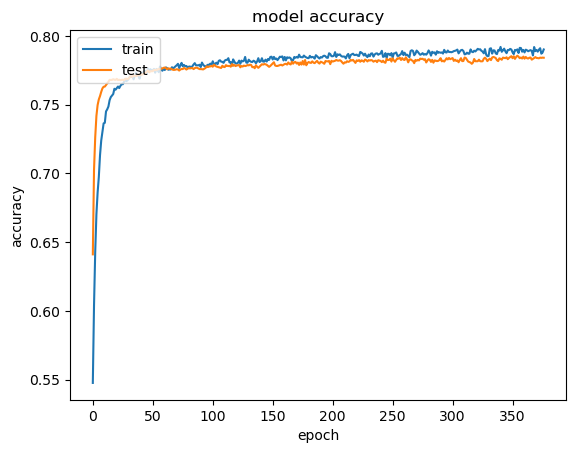

In [80]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

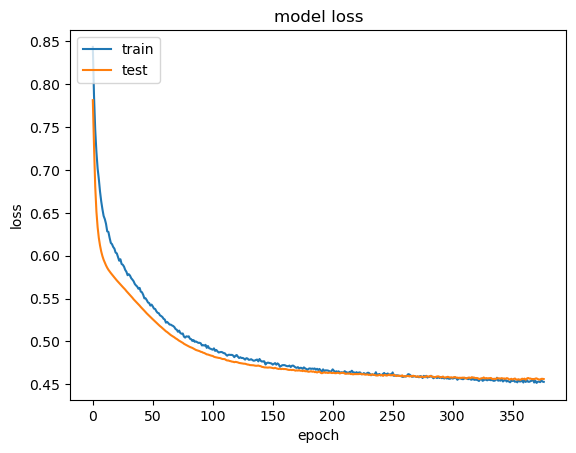

In [81]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
test_df = pd.read_excel('aus_weather_test.csv.xlsx', sheet_name = 0)

In [112]:
test_df.head()

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,41959,2015-11-16,Williamtown,13.4,22.1,35.4,S,35.0,SW,SSE,...,22.0,73.0,55.0,1019.4,1018.0,3.0,1.0,18.9,21.4,1
1,14497,2015-11-25,Moree,16.9,37.7,0.0,NNE,41.0,NNE,NNE,...,17.0,59.0,20.0,1014.0,1009.1,0.0,2.0,26.6,35.9,0
2,12429,2009-12-29,Moree,21.3,23.8,34.2,ENE,30.0,ESE,SE,...,17.0,90.0,92.0,1016.3,1015.2,8.0,8.0,23.0,22.9,1
3,75265,2009-10-13,Portland,7.2,14.4,9.6,WNW,74.0,NW,WNW,...,30.0,96.0,91.0,989.5,990.4,7.0,8.0,9.9,11.2,1
4,80668,2016-07-31,Watsonia,10.3,16.3,0.8,N,56.0,NNW,ENE,...,9.0,87.0,55.0,1017.0,1014.6,3.0,2.0,11.7,15.8,0


In [113]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12751 entries, 0 to 12750
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             12751 non-null  int64         
 1   Date           12751 non-null  datetime64[ns]
 2   Location       12751 non-null  object        
 3   MinTemp        12751 non-null  float64       
 4   MaxTemp        12751 non-null  float64       
 5   Rainfall       12751 non-null  float64       
 6   WindGustDir    12751 non-null  object        
 7   WindGustSpeed  12751 non-null  float64       
 8   WindDir9am     12751 non-null  object        
 9   WindDir3pm     12751 non-null  object        
 10  WindSpeed9am   12751 non-null  float64       
 11  WindSpeed3pm   12751 non-null  float64       
 12  Humidity9am    12751 non-null  float64       
 13  Humidity3pm    12751 non-null  float64       
 14  Pressure9am    12751 non-null  float64       
 15  Pressure3pm    1275

In [114]:
test_df.isna().sum()

Id               0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [115]:
test_df.drop(['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location'], axis  = 1, inplace = True)

In [116]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12751 entries, 0 to 12750
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             12751 non-null  int64  
 1   MinTemp        12751 non-null  float64
 2   MaxTemp        12751 non-null  float64
 3   Rainfall       12751 non-null  float64
 4   WindGustSpeed  12751 non-null  float64
 5   WindSpeed9am   12751 non-null  float64
 6   WindSpeed3pm   12751 non-null  float64
 7   Humidity9am    12751 non-null  float64
 8   Humidity3pm    12751 non-null  float64
 9   Pressure9am    12751 non-null  float64
 10  Pressure3pm    12751 non-null  float64
 11  Cloud9am       12751 non-null  float64
 12  Cloud3pm       12751 non-null  float64
 13  Temp9am        12751 non-null  float64
 14  Temp3pm        12751 non-null  float64
 15  RainToday      12751 non-null  int64  
dtypes: float64(14), int64(2)
memory usage: 1.6 MB


MinTemp


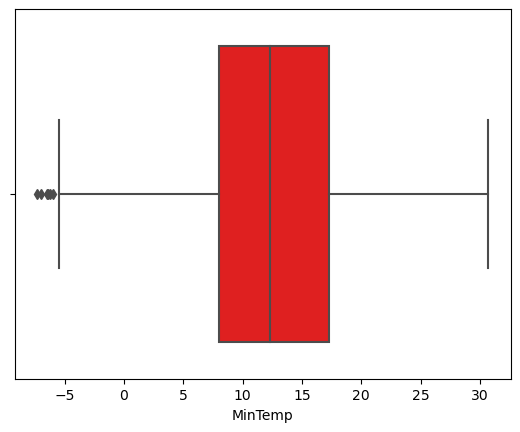

MaxTemp


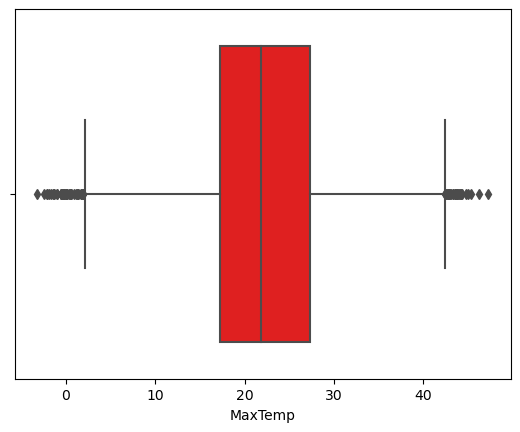

Rainfall


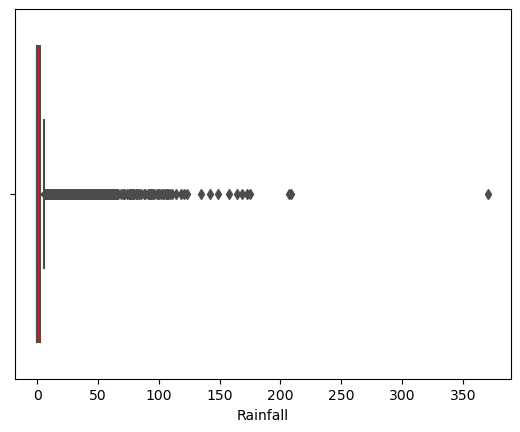

WindGustSpeed


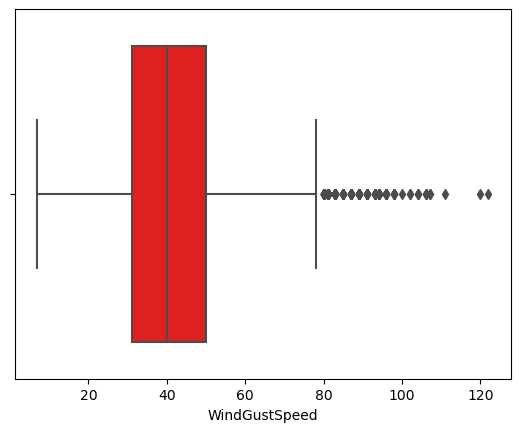

WindSpeed9am


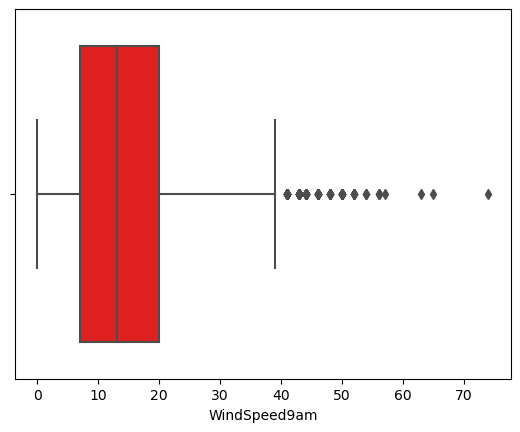

WindSpeed3pm


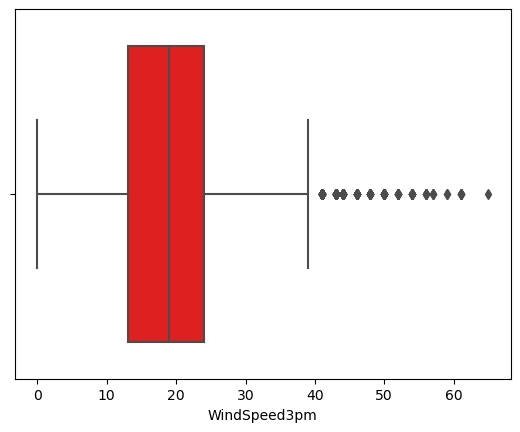

Humidity9am


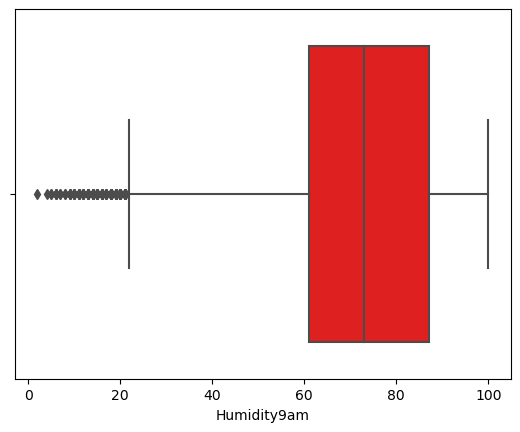

Humidity3pm


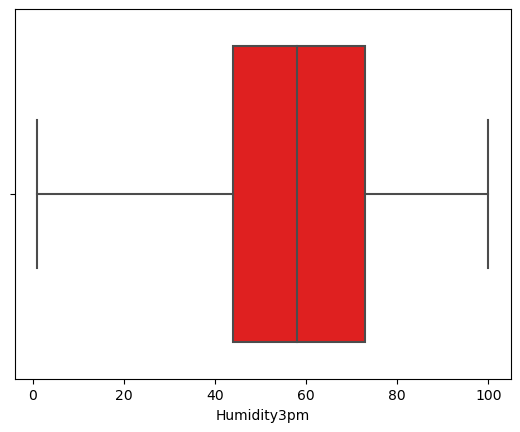

Pressure9am


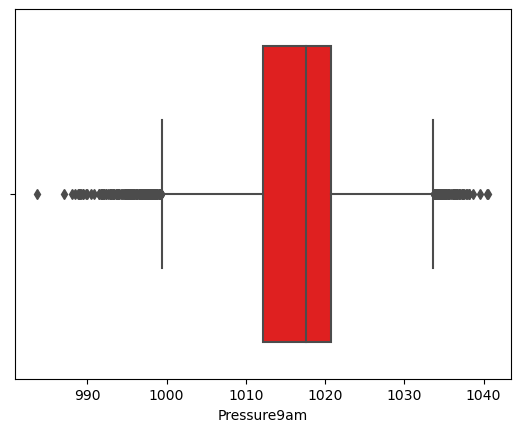

Pressure3pm


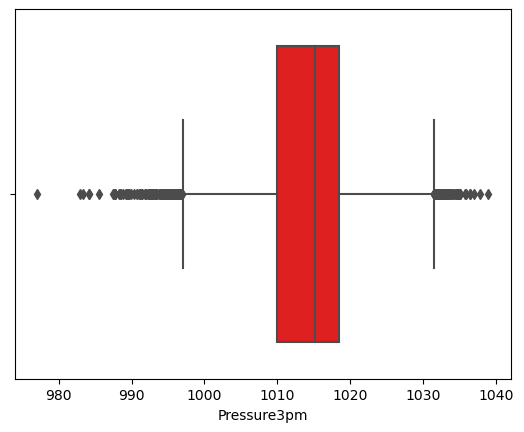

Cloud9am


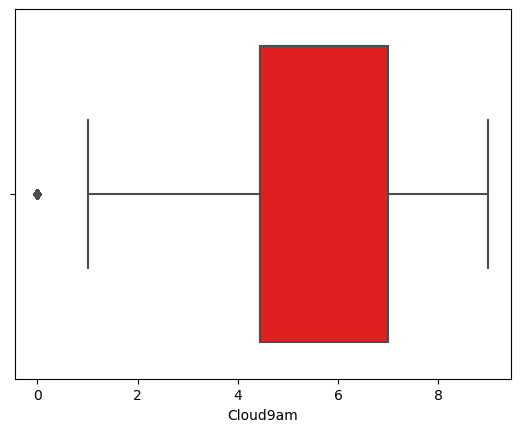

Cloud3pm


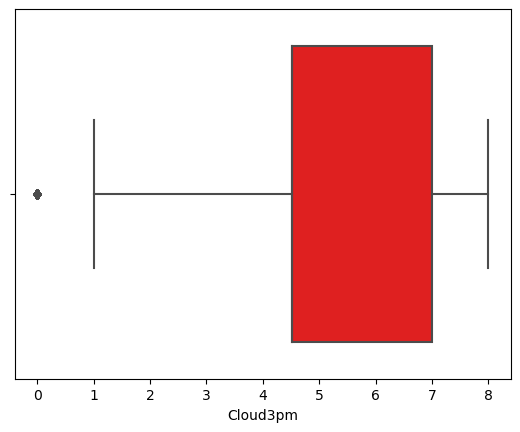

Temp9am


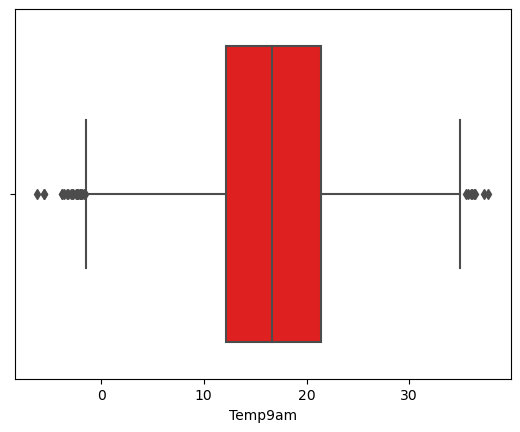

Temp3pm


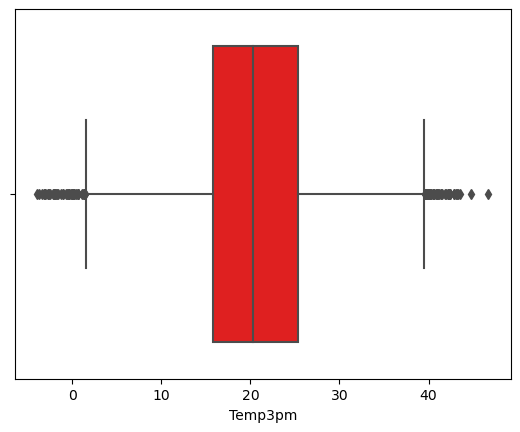

In [117]:
for col in test_df.iloc[:,1:15].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [118]:
def Outlier(var):
    for x in var.iloc[:, 1:15].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(test_df)

MinTemp


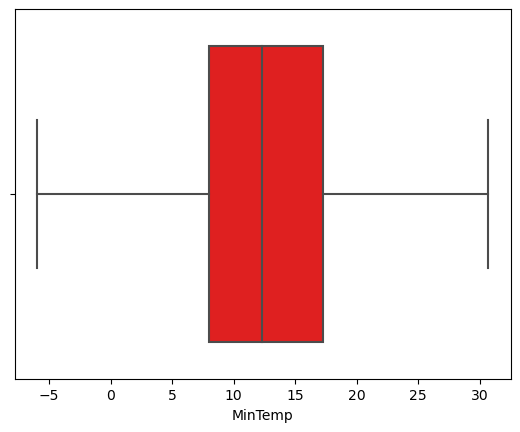

MaxTemp


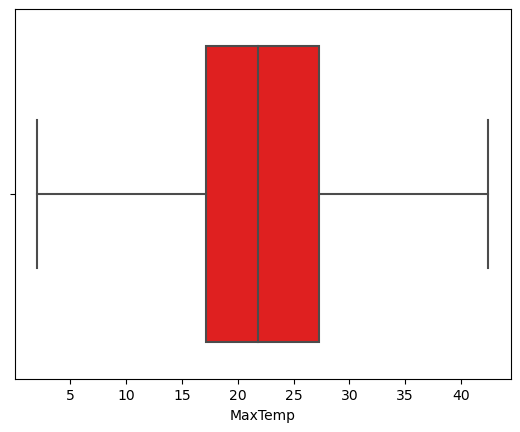

Rainfall


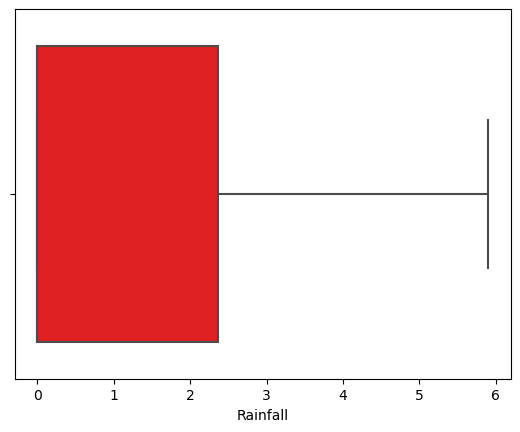

WindGustSpeed


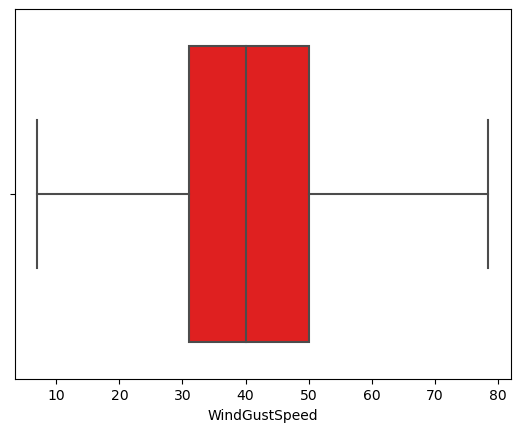

WindSpeed9am


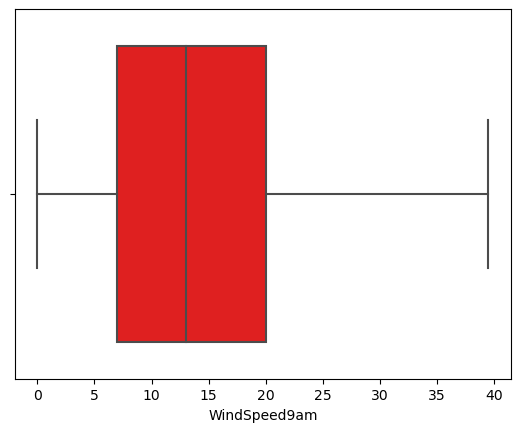

WindSpeed3pm


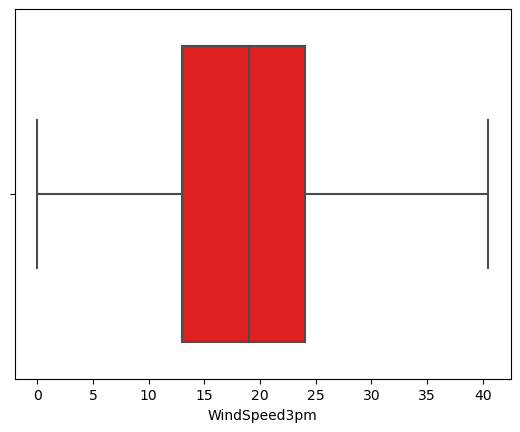

Humidity9am


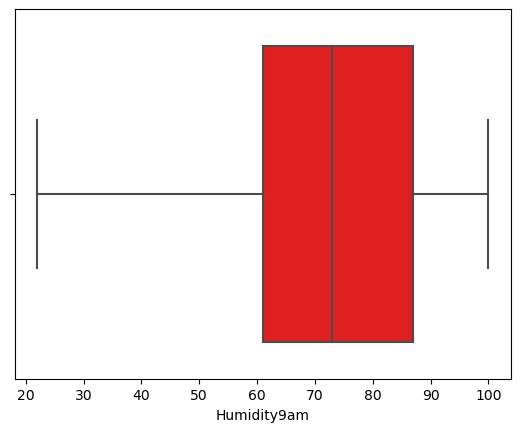

Humidity3pm


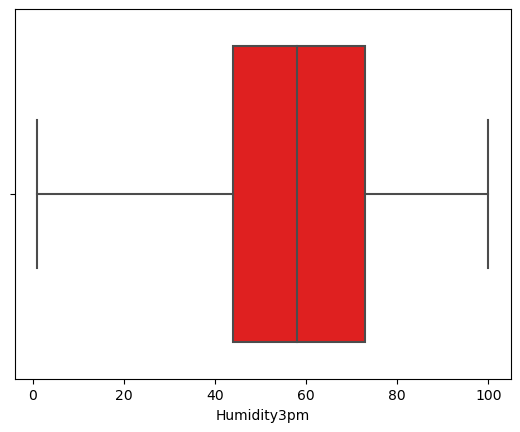

Pressure9am


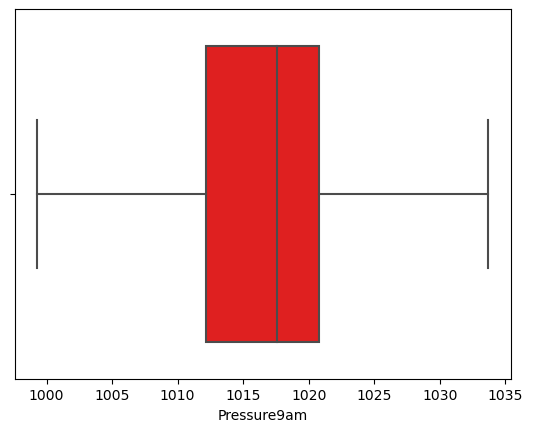

Pressure3pm


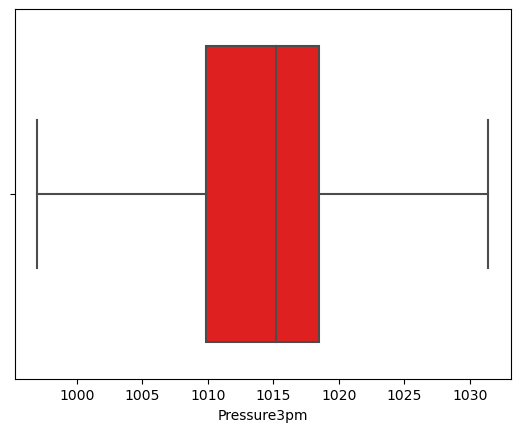

Cloud9am


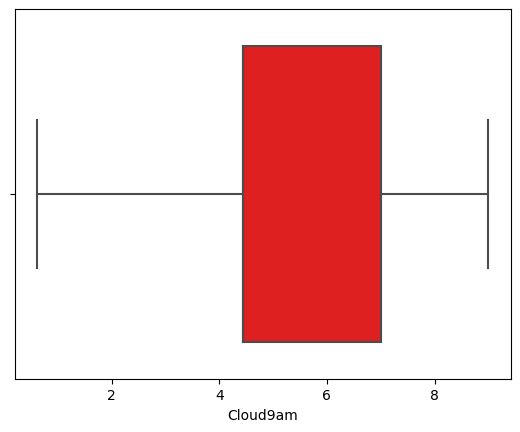

Cloud3pm


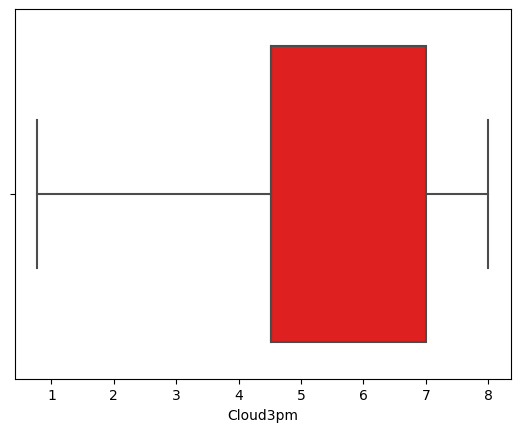

Temp9am


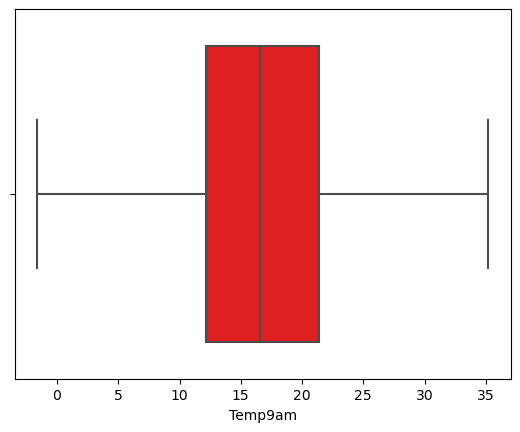

Temp3pm


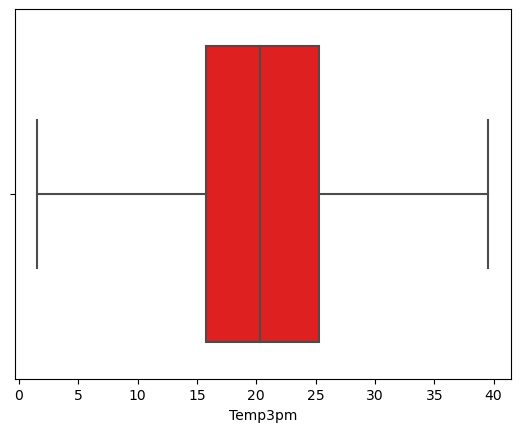

In [119]:
for col in test_df.iloc[:,1:15].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [120]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12751 entries, 0 to 12750
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             12751 non-null  int64  
 1   MinTemp        12751 non-null  float64
 2   MaxTemp        12751 non-null  float64
 3   Rainfall       12751 non-null  float64
 4   WindGustSpeed  12751 non-null  float64
 5   WindSpeed9am   12751 non-null  float64
 6   WindSpeed3pm   12751 non-null  float64
 7   Humidity9am    12751 non-null  float64
 8   Humidity3pm    12751 non-null  float64
 9   Pressure9am    12751 non-null  float64
 10  Pressure3pm    12751 non-null  float64
 11  Cloud9am       12751 non-null  float64
 12  Cloud3pm       12751 non-null  float64
 13  Temp9am        12751 non-null  float64
 14  Temp3pm        12751 non-null  float64
 15  RainToday      12751 non-null  int64  
dtypes: float64(14), int64(2)
memory usage: 1.6 MB


In [121]:
aus_test = df_test.iloc[:, 1:]

In [122]:
aus_test.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.1,5.902295,35.0,20.0,22.0,73.0,55.0,1019.4,1018.0,3.000000,1.0,18.9,21.4,1
1,16.9,37.7,0.000000,41.0,30.0,17.0,59.0,20.0,1014.0,1009.1,0.618653,2.0,26.6,35.9,0
2,21.3,23.8,5.902295,30.0,11.0,17.0,90.0,92.0,1016.3,1015.2,8.000000,8.0,23.0,22.9,1
3,7.2,14.4,5.902295,74.0,26.0,30.0,96.0,91.0,999.3,997.0,7.000000,8.0,9.9,11.2,1
4,10.3,16.3,0.800000,56.0,13.0,9.0,87.0,55.0,1017.0,1014.6,3.000000,2.0,11.7,15.8,0


In [123]:
aus_test = scaler.transform(aus_test)

In [124]:
predicted__test = model.predict(aus_test)

399/399 [==============================] - 0s 600us/step


In [125]:
predicted__test

array([[0.25457644],
       [0.04418887],
       [0.90326345],
       ...,
       [0.34565127],
       [0.9241991 ],
       [0.8693445 ]], dtype=float32)

In [126]:
predicted__test.dtype

dtype('float32')

In [127]:
predicted__test = predicted__test.round()
predicted__test

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [128]:
df_test['Rain Tomorrow'] = predicted__test

In [129]:
df_test.head(10)

,Id,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Rain Tomorrow
0,41959,13.4,22.1,5.902295,35.0,20.0,22.0,73.0,55.0,1019.4,1018.0,3.000000,1.00000,18.9,21.4,1,0.0
1,14497,16.9,37.7,0.000000,41.0,30.0,17.0,59.0,20.0,1014.0,1009.1,0.618653,2.00000,26.6,35.9,0,0.0
2,12429,21.3,23.8,5.902295,30.0,11.0,17.0,90.0,92.0,1016.3,1015.2,8.000000,8.00000,23.0,22.9,1,1.0
3,75265,7.2,14.4,5.902295,74.0,26.0,30.0,96.0,91.0,999.3,997.0,7.000000,8.00000,9.9,11.2,1,1.0
4,80668,10.3,16.3,0.800000,56.0,13.0,9.0,87.0,55.0,1017.0,1014.6,3.000000,2.00000,11.7,15.8,0,0.0
5,11425,12.1,18.9,0.000000,69.0,39.0,40.5,50.0,49.0,1020.9,1020.3,4.447461,4.50993,16.5,17.1,0,0.0
6,64429,7.7,17.6,0.000000,61.0,31.0,33.0,63.0,42.0,1012.0,1009.6,1.000000,6.00000,11.2,16.6,0,0.0
7,141418,28.3,32.7,0.000000,54.0,26.0,39.0,77.0,70.0,1007.8,1004.9,7.000000,5.00000,30.0,31.9,0,1.0
8,117357,10.4,20.2,1.600000,63.0,17.0,17.0,84.0,90.0,1013.8,1011.1,8.000000,8.00000,15.9,13.9,1,1.0
9,65383,8.4,14.3,0.000000,69.0,31.0,39.0,75.0,69.0,1017.5,1012.9,7.000000,7.00000,10.4,13.2,0,1.0


In [131]:
df_test['Rain Tomorrow'] = df_test['Rain Tomorrow'].astype('int')

In [132]:
df_test.head()

,Id,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Rain Tomorrow
0,41959,13.4,22.1,5.902295,35.0,20.0,22.0,73.0,55.0,1019.4,1018.0,3.000000,1.0,18.9,21.4,1,0
1,14497,16.9,37.7,0.000000,41.0,30.0,17.0,59.0,20.0,1014.0,1009.1,0.618653,2.0,26.6,35.9,0,0
2,12429,21.3,23.8,5.902295,30.0,11.0,17.0,90.0,92.0,1016.3,1015.2,8.000000,8.0,23.0,22.9,1,1
3,75265,7.2,14.4,5.902295,74.0,26.0,30.0,96.0,91.0,999.3,997.0,7.000000,8.0,9.9,11.2,1,1
4,80668,10.3,16.3,0.800000,56.0,13.0,9.0,87.0,55.0,1017.0,1014.6,3.000000,2.0,11.7,15.8,0,0


In [133]:
df_test.to_csv('submission_auss.csv', index = False, header = False)